# Project-FRA503 Machine Learning

### 1. Data Exploration

**Market Segmentation in Insurance**

Link : 
https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised

In marketing, market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into subgroups of consumers based on some type of shared characteristics.

Objective :
This case requires developing a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customer groups.

The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### **1.1 Read data**

In [125]:
import pandas as pd

In [126]:
df = pd.read_csv("Customer Data.csv")
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [127]:
df.shape

(8950, 18)

#### **1.2 Find missing value**

In [128]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### **1.3 Seperate categorical and numeric data**

**Categorical data**

1. CUST_ID

* CUST_ID เป็น attribute ที่ไม่สำคัญ ไม่ได้บ่งบอกถึงลักษณะของลูกค้า ไม่จำเป็นต้องใช้

In [129]:
import numpy as np

In [130]:
catDf = df.select_dtypes(exclude=np.number)
catDf.head()

CUST_ID
0  C10001
1  C10002
2  C10003
3  C10004
4  C10005

**Numeric data**

1. BALANCE : เงินคงเหลือของ credit card เฉลี่ยต่อเดือน
2. BALANCE_FREQUENCY : อัตราส่วนของ 12 เดือนล่าสุด กับ เงินคงเหลือ
3. PURCHASES : จำนวนเงินทั้งหมดที่ใช้
4. ONEOFF_PURCHASES : จำนวนเงินที่ใช้ creadit card จ่ายทีเดียว
5. INSTALLMENTS_PURCHASES : จำนวนเงินที่ใช้ creadit card จ่ายแบบผ่อน
6. CASH_ADVANCE : จำนวนเงินสดที่ถอนจาก credit card
7. PURCHASES_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายเงิน
8. ONEOFF_PURCHASES_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายทีเดียว
9. PURCHASES_INSTALLMENTS_FREQUENCY : ความถี่ที่ใช้ creadit card จ่ายแบบผ่อน
10. CASH_ADVANCE_FREQUENCY : ความถี่ที่ถอนเงินสดที่ถอนจาก credit card
11. CASH_ADVANCE_TRX : จำนวนเงินเฉลี่ยที่ถอนจาก credit card 1 ครั้ง
12. PURCHASES_TRX : จำนวนเงินเฉลี่ยต่อการใช้ credit card 1 ครั้ง
13. CREDIT_LIMIT : วงเงินจำกัดของ credit card
14. PAYMENTS : จำนวนเงินที่ชำระ credit card 
15. MINIMUM_PAYMENTS : จำนวนเงินที่ชำระขั้นต่ำ
16. PRC_FULL_PAYMENT : เปอร์เซ็นต์ของ เดือน กับ จำนวนเงินชำระทั้งหมดของใบแจ้งยอด
17. TENURE : จำนวนเดือนที่เป็นลูกค้ามา

# Edit Assumption & Selected attribute

**Assumption**

จำนวนเงินที่มี จำนวนเงินที่ใช้ และลักษณะการใช้จ่าย ทำให้แบ่งกลุ่มลูกค้าได้ ซึ่งแต่ละกลุ่มเหมาะกับรูปแบบประกันและการจ่ายเบี้ยที่แตกต่างกัน เนื่องจากประกันแต่ละรูปแบบมีค่าเบี้ยประกันที่แตกต่างกันตั้งแต่ต่ำถึงสูง รวมถึงมีรายละเอียดที่แตกต่างกัน เช่น บางประกันสามารถนำเงินไปลงทุนต่อได้ อาจเหมาะสำหรับคนที่ชอบใช้จ่าย นอกจากนั้นการเสนอลักษณะการจ่ายเบี้ยให้เหมาะสมกับกลุ่มลูกค้าที่แตกต่างกัน อาจทำให้ลูกค้าเกิดความสนใจในการซื้อได้มากขึ้น

In [131]:
numDf = df.select_dtypes(include=np.number)
numDf.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

**Selected features**

จากสมมติฐาน จึงเลือกใช้ BALANCE, PURCHASES, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PAYMENTS เนื่องจากเป็น feature ที่เกี่ยวข้องกับจำนวนเงิน การใช้จ่าย และลักษณะการใช้จ่าย

In [132]:
selectedCol = ['BALANCE', 'PURCHASES', 'PURCHASES_TRX',
               'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
               'PAYMENTS']
selectedNumDf = numDf[selectedCol]
selectedNumDf.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                    0.000000   
1  3202.467416       0.00              0                    0.000000   
2  2495.148862     773.17             12                    1.000000   
3  1666.670542    1499.00              1                    0.083333   
4   817.714335      16.00              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

#### **1.4 Visualize numeric data**

โดยเลือก feature ตามสมมติฐานที่ตั้งไว้มา visualize เพื่อดู insight ของลูกค้า ว่ามีลูกค้าแบบใดบ้าง และนำไปเปรียบเทียบกับผลลัพธ์จากการแบ่ง cluster ว่า cluster ที่แบ่งมาเป็นไปตามข้อมูลที่มีหรือไม่

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

**Function histPlot()**

In [135]:
import math

def histPlot(df, y, n):
    col = df.columns
    fig,ax = plt.subplots(math.ceil(n/4), 4, figsize=(30,math.ceil(n/4)*6))

    i = 0
    for j in range(len(col)):
        sns.histplot(data=df, x=col[j], hue=y, kde=True, ax=ax[i][j%4])
        if j%4 == 3:
            i += 1
    plt.show()

Function boxPlot()

In [136]:
def boxPlot(df, y, n):
    col = df.columns
    col = [i for i in col if i != y]
    fig,ax = plt.subplots(math.ceil(n/4), 4, figsize=(30,math.ceil(n/4)*6))

    i = 0
    for j in range(0,len(col)):
        sns.boxplot(data=df, y=col[j], x=y, hue=y, ax=ax[i][j%4])
        if j%4 == 3:
            i += 1

    plt.show()

**Correlation between features**

ใช้ heatmap() เพื่อดู correlation ระหว่าง feature โดยจะเห็นได้ว่า PURCHASES กับ PURCHASES_TRX, PURCHASES กับ PAYMENTS มีความสัมพันธ์กันค่อนข้างมาก

<AxesSubplot:>

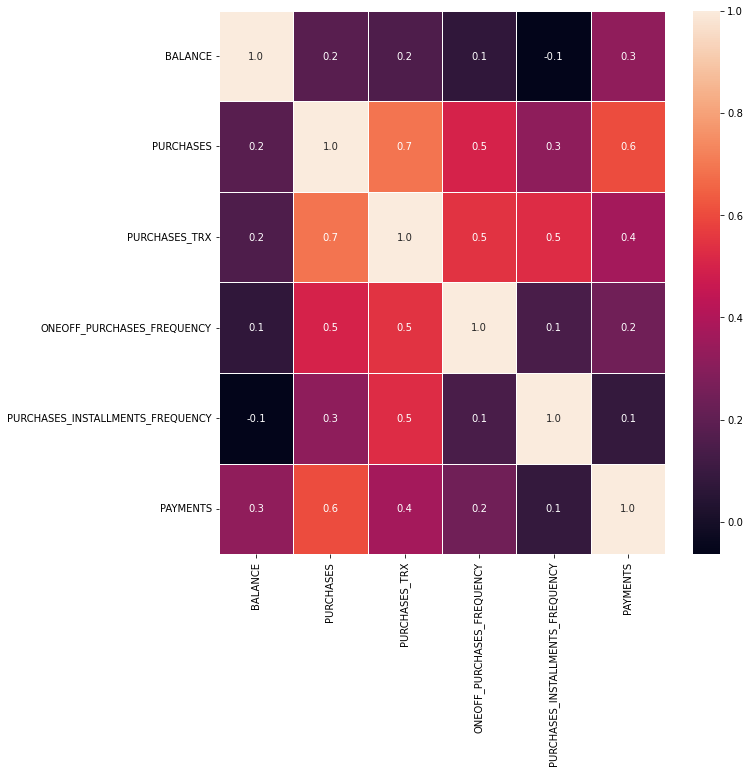

In [137]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=selectedNumDf.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

**Histrogram plot**

เพื่อดูการกระจายตัวของข้อมูลในแต่ละ feature โดยจะเห็นได้ว่าแต่ละ feature มีการกระจายตัวแบบเบ้ซ้าย รวมถึงมีข้อมูลที่เป็น 0 ค่อนข้างมาก

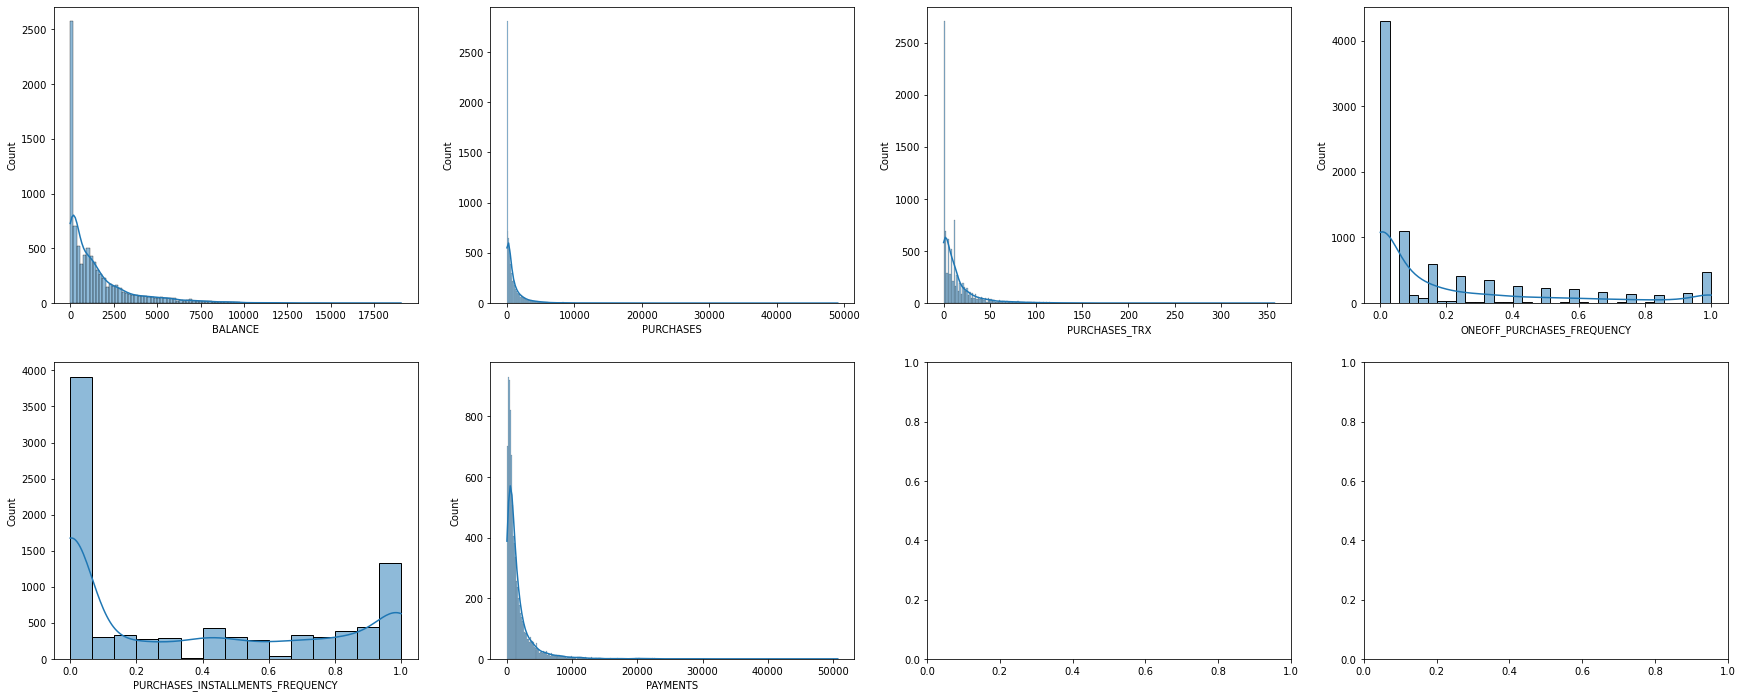

In [138]:
histPlot(selectedNumDf, None, 6)

**Seperate into groups of each features**

โดยแบ่งกลุ่มตามช่วงของค่าในแต่ละ feature (min, 25%, 50%, 75%, max)

**BALANCE**

In [139]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [140]:
numDfGroup1 = selectedNumDf.copy()
num = [0, 128.28, 873.39, 2054.14, 19043.14]
balanceGroup=['1','2','3','4']
numDfGroup1['BALANCE']=pd.cut(df['BALANCE'], num, labels= balanceGroup)
numDfGroup1.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0       1      95.40              2                    0.000000   
1       4       0.00              0                    0.000000   
2       4     773.17             12                    1.000000   
3       3    1499.00              1                    0.083333   
4       2      16.00              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

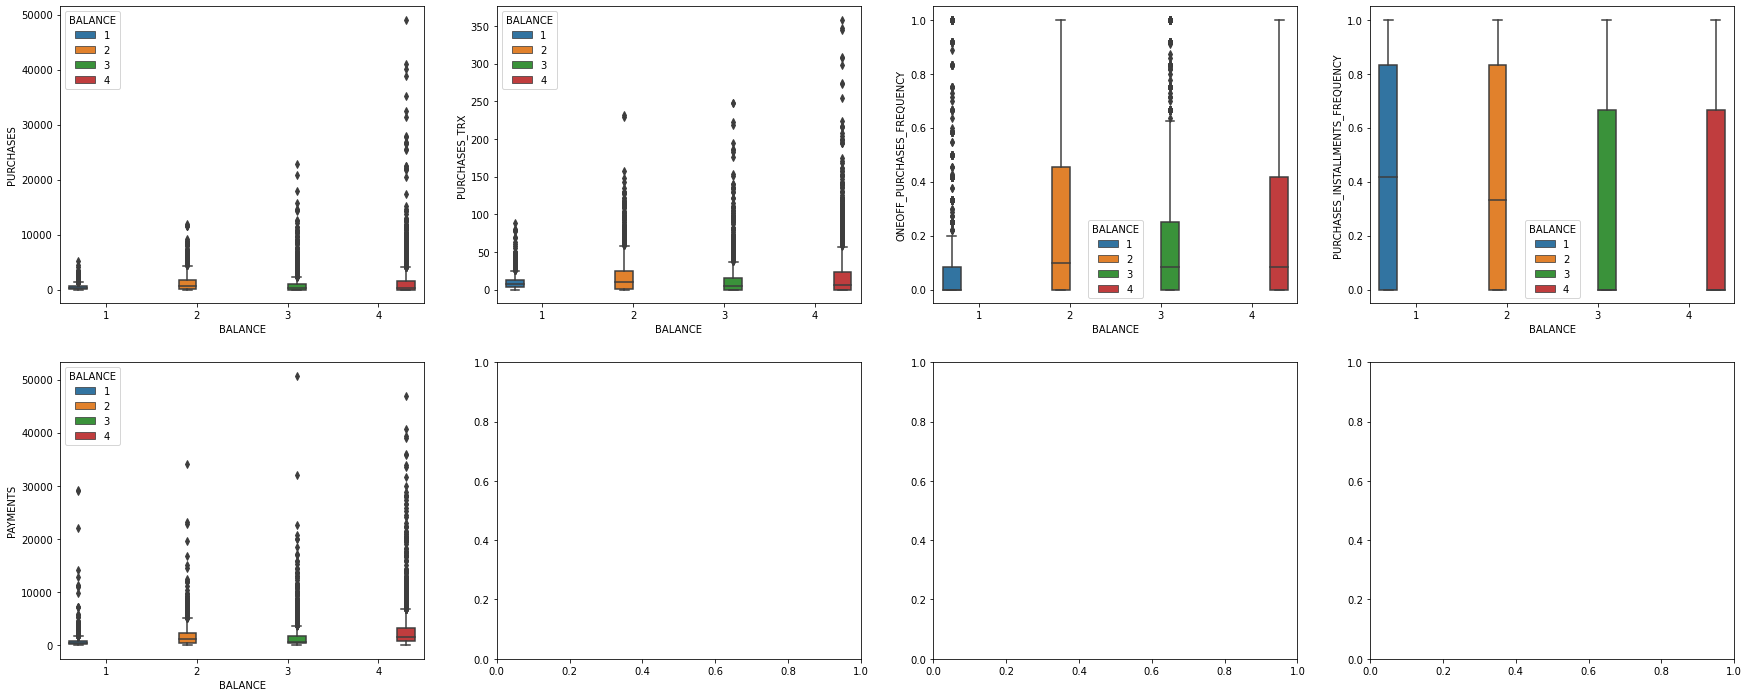

In [141]:
boxPlot(numDfGroup1, 'BALANCE', 5)

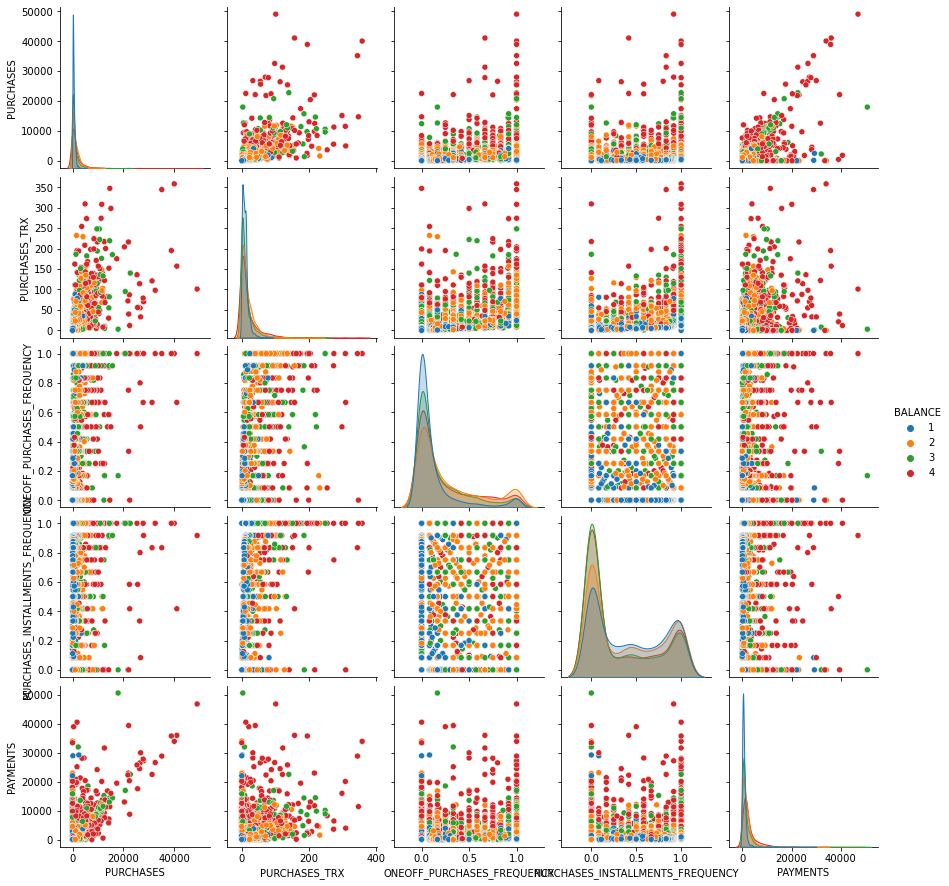

In [142]:
sns.pairplot(data=numDfGroup1, hue='BALANCE')

**Summary**

- คนที่มี PURCHASES สูง ส่วนใหญ่จะเป็นคนที่มี BALANCE สูง แต่คนที่มี PURCHASES ต่ำ มีทั้งกลุ่มที่มี BALANCE ต่ำ ปานกลาง และสูง
- คนที่มี PURCHASES ต่ำ ส่วนใหญ่จะมี ONEOFF_PURCHASES_FREQUENCY น้อย

**PURCHASES**

In [143]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [144]:
numDfGroup2 = selectedNumDf.copy()
num = [-0.01, 39.635, 361.28, 1110.13, 49039.57]
balanceGroup=['1','2','3','4']
numDfGroup2['PURCHASES']=pd.cut(df['PURCHASES'], num, labels= balanceGroup)
numDfGroup2.head()

BALANCE PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749         2              2                    0.000000   
1  3202.467416         1              0                    0.000000   
2  2495.148862         3             12                    1.000000   
3  1666.670542         4              1                    0.083333   
4   817.714335         1              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

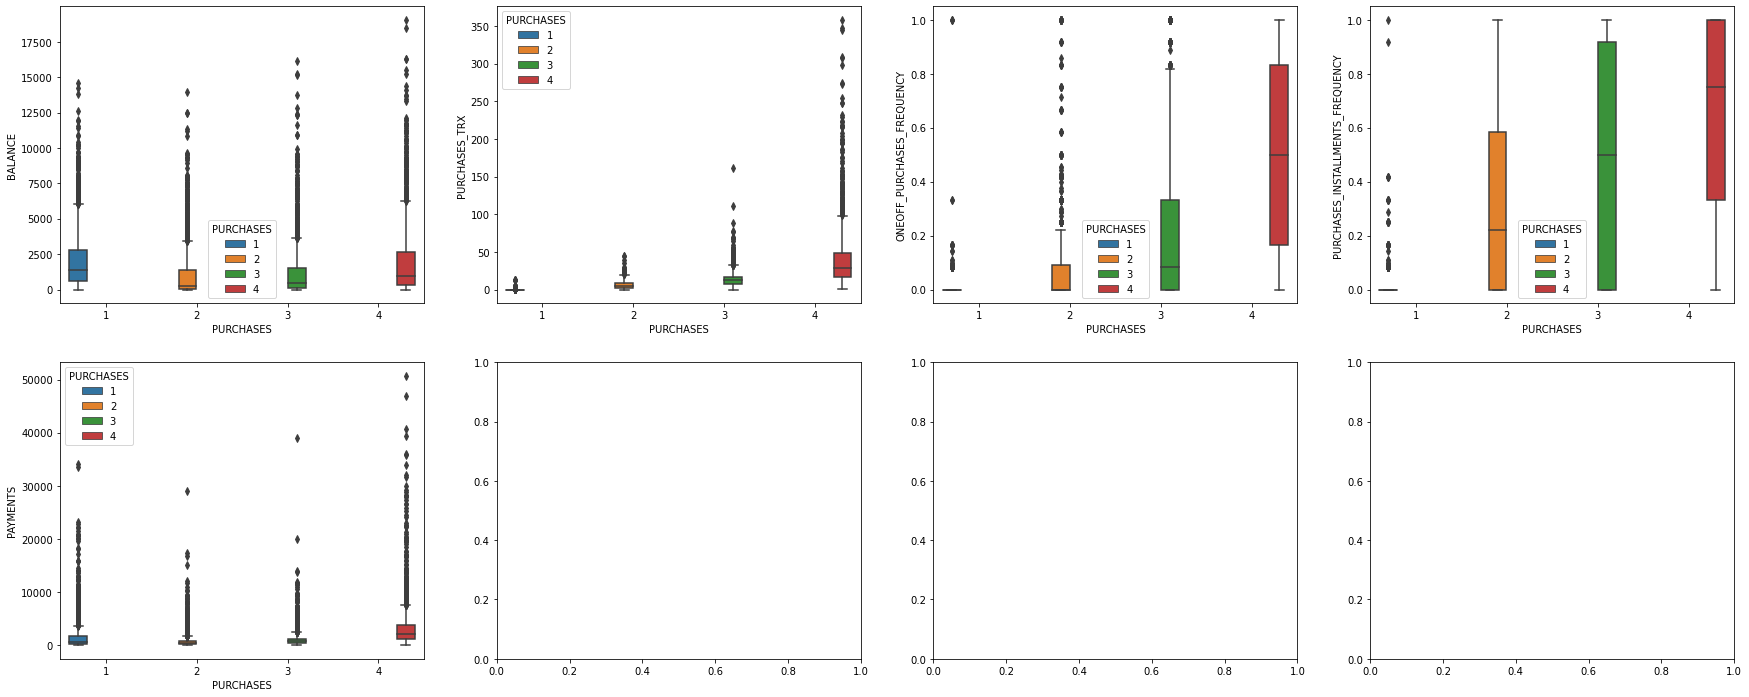

In [145]:
boxPlot(numDfGroup2, 'PURCHASES', 5)

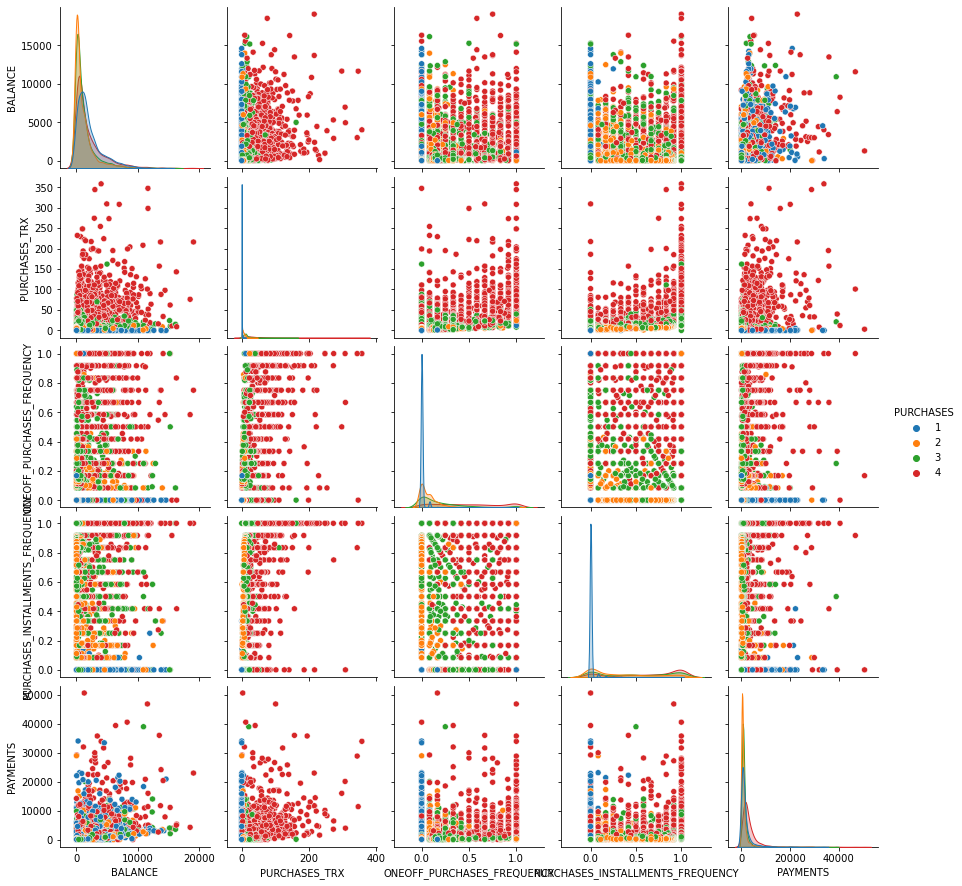

In [146]:
sns.pairplot(data=numDfGroup2, hue='PURCHASES')

**Summary**

- PURCHASES_TRX ค่อนข้างไปในทางเดียวกับ PURCHASES โดยคนที่มี PURCHASES_TRX ค่อนข้างสูงถึงสูง จะเป็นคนที่มี PURCHASES สูงด้วย
- คนที่มี ONEOFF_PURCHASES_FREQUENCY กับ PURCHASES_INSTALLMENTS_FREQUENCY น้อย ส่วนใหญ่จะเป็นกลุ่มคนที่มี PURCHASES น้อย

**PURCHASES_TRX**

In [147]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [148]:
numDfGroup3 = selectedNumDf.copy()
num = [-0.001, 1.00, 7.00, 17.00, 358.01]
balanceGroup=['1','2','3','4']
numDfGroup3['PURCHASES_TRX']=pd.cut(df['PURCHASES_TRX'], num, labels= balanceGroup)
numDfGroup3.head()

BALANCE  PURCHASES PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40             2                    0.000000   
1  3202.467416       0.00             1                    0.000000   
2  2495.148862     773.17             3                    1.000000   
3  1666.670542    1499.00             1                    0.083333   
4   817.714335      16.00             1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

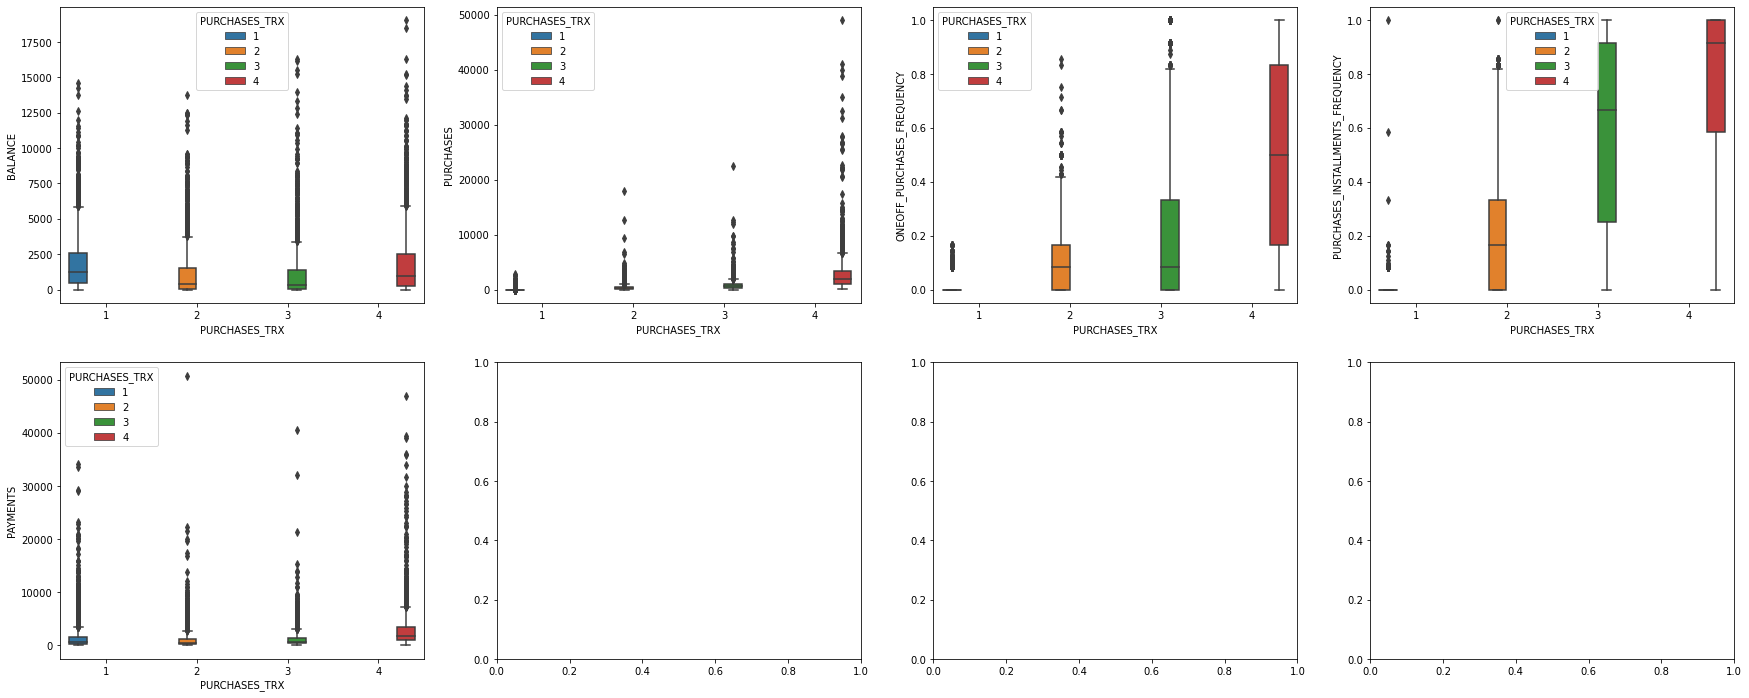

In [149]:
boxPlot(numDfGroup3, 'PURCHASES_TRX', 5)

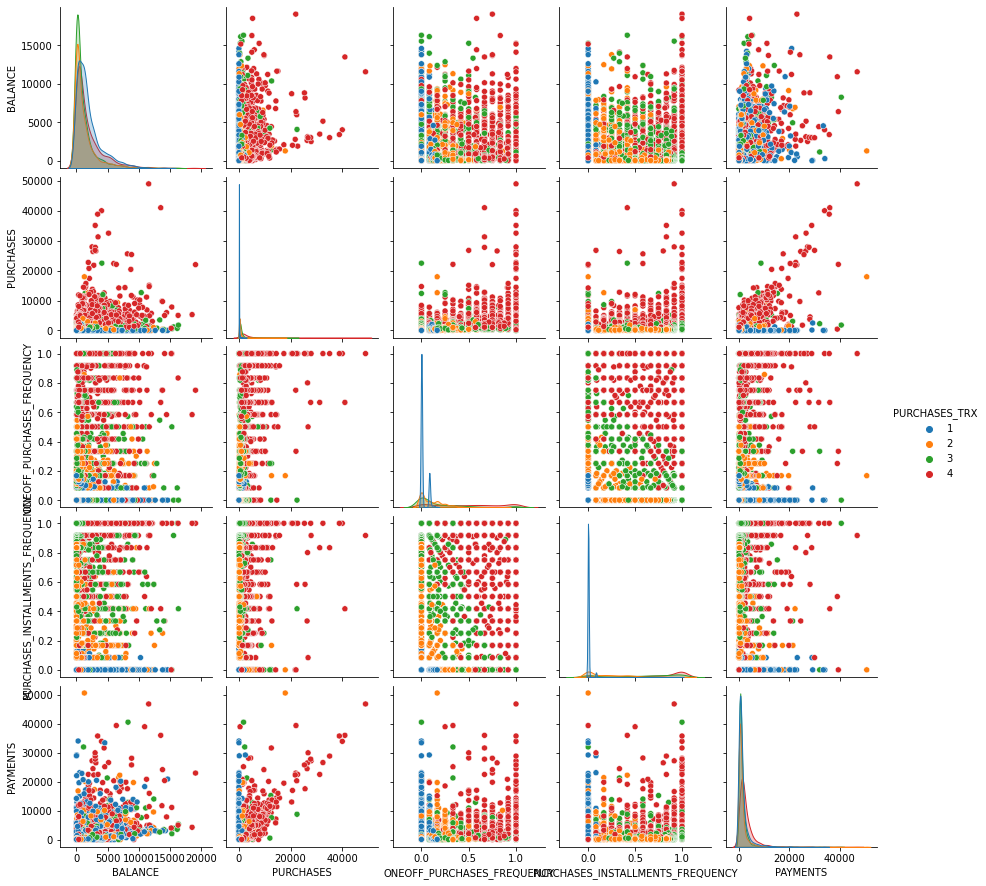

In [150]:
sns.pairplot(data=numDfGroup3, hue='PURCHASES_TRX')

**Summary**

- คนที่มี PURCHASES สูง ส่วนใหญ่จะมี PURCHASES_TRX สูง
- คนที่มี PURCHASES_TRX สูง ส่วนใหญ่จะมี PURCHASES_INSTALLMENTS_FREQUENCY สูงด้วย

**ONEOFF_PURCHASES_FREQUENCY**

In [151]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [152]:
numDfGroup4 = selectedNumDf.copy()
num = [-0.001, 0.083, 0.3, 1.00]
balanceGroup=['1','2','3']
numDfGroup4['ONEOFF_PURCHASES_FREQUENCY']=pd.cut(df['ONEOFF_PURCHASES_FREQUENCY'], num, labels= balanceGroup)
numDfGroup4.head()

BALANCE  PURCHASES  PURCHASES_TRX ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                          1   
1  3202.467416       0.00              0                          1   
2  2495.148862     773.17             12                          3   
3  1666.670542    1499.00              1                          2   
4   817.714335      16.00              1                          2   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

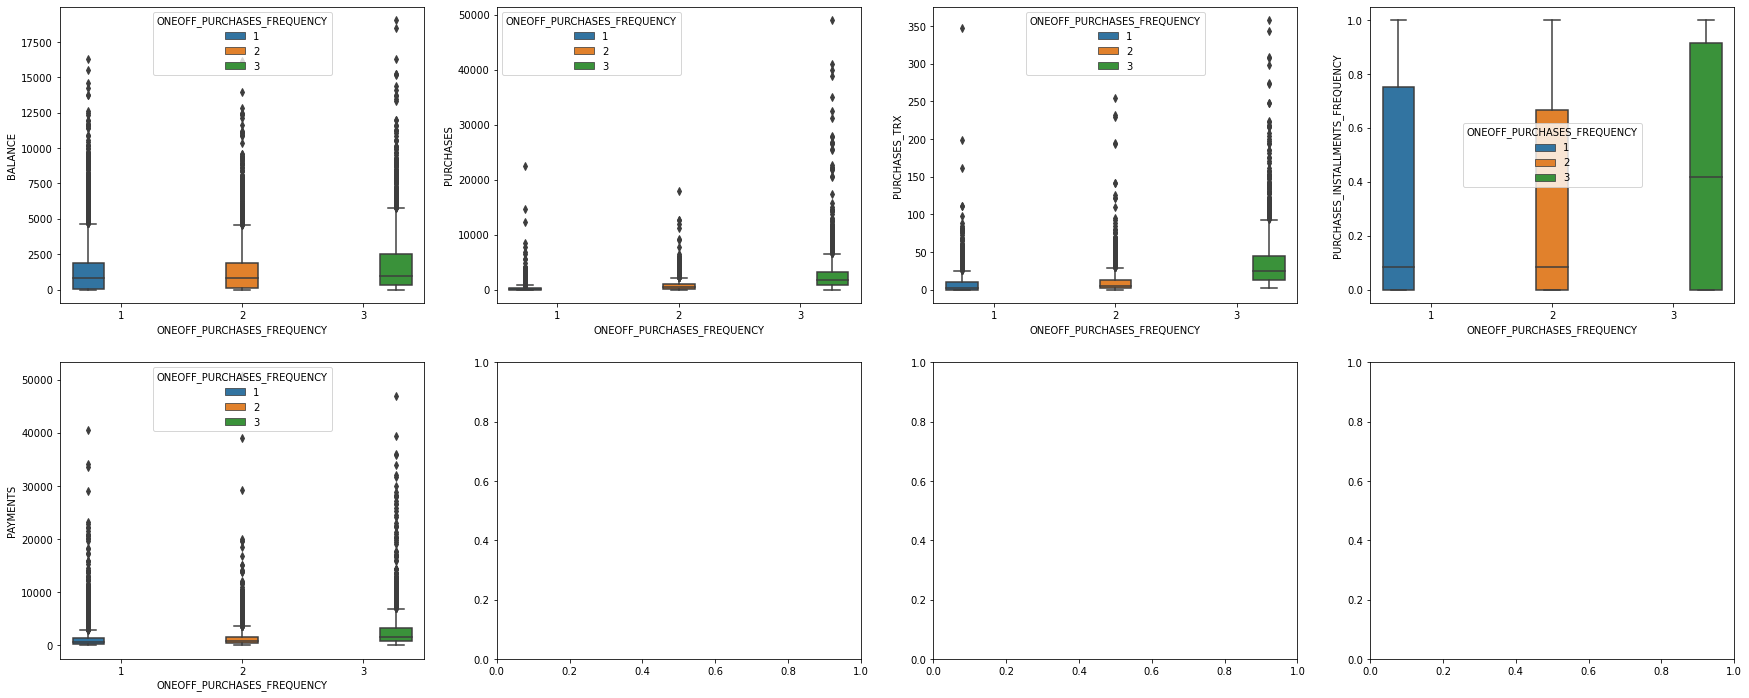

In [153]:
boxPlot(numDfGroup4, 'ONEOFF_PURCHASES_FREQUENCY', 5)

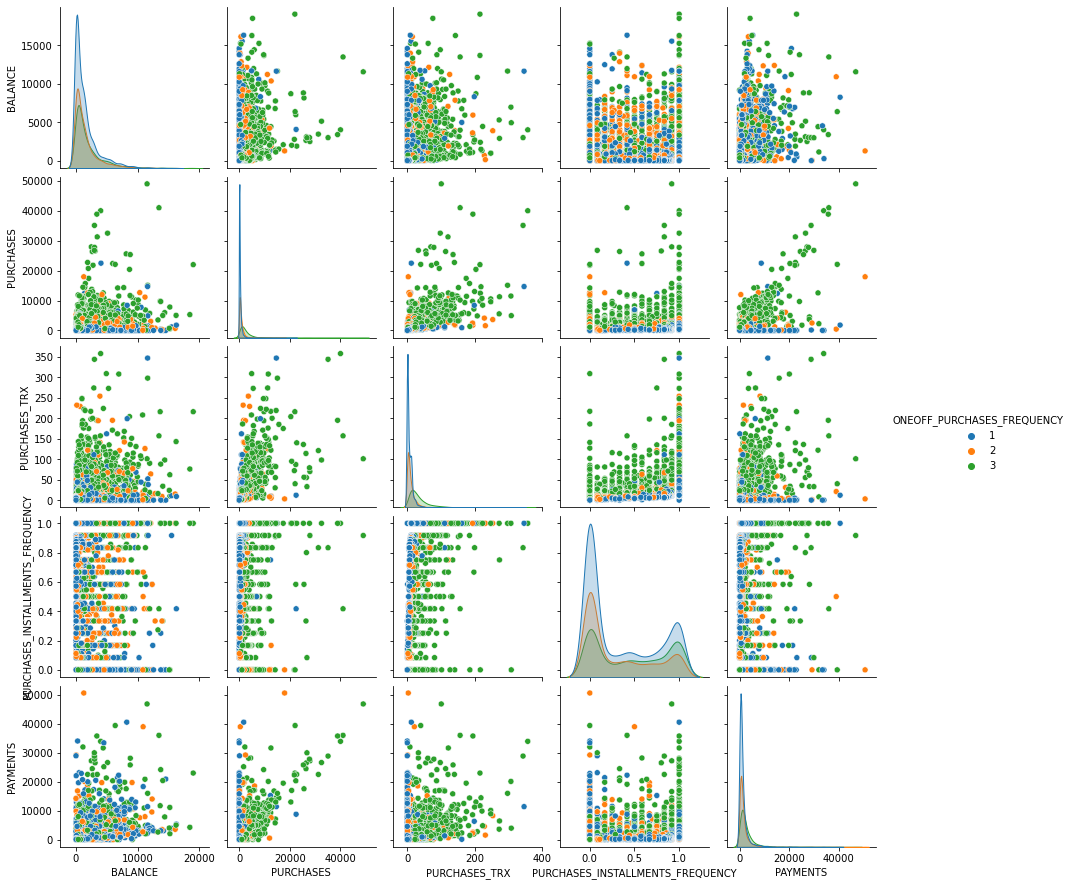

In [154]:
sns.pairplot(data=numDfGroup4, hue='ONEOFF_PURCHASES_FREQUENCY')

**Summary**

- คนที่มี PURCHASES สูง ส่วนใหญ่จะมี ONEOFF_PURCHASES_FREQUENTY สูงตามไปด้วย

**PURCHASES_INSTALLMENTS_FREQUENCY**

In [155]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [156]:
numDfGroup5 = selectedNumDf.copy()
num = [-0.001, 0.17, 0.75, 1.00]
balanceGroup=['1','2','3']
numDfGroup5['PURCHASES_INSTALLMENTS_FREQUENCY']=pd.cut(df['PURCHASES_INSTALLMENTS_FREQUENCY'], num, labels= balanceGroup)
numDfGroup5.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                    0.000000   
1  3202.467416       0.00              0                    0.000000   
2  2495.148862     773.17             12                    1.000000   
3  1666.670542    1499.00              1                    0.083333   
4   817.714335      16.00              1                    0.083333   

  PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                                1   201.802084  
1                                1  4103.032597  
2                                1   622.066742  
3                                1     0.000000  
4                                1   678.334763

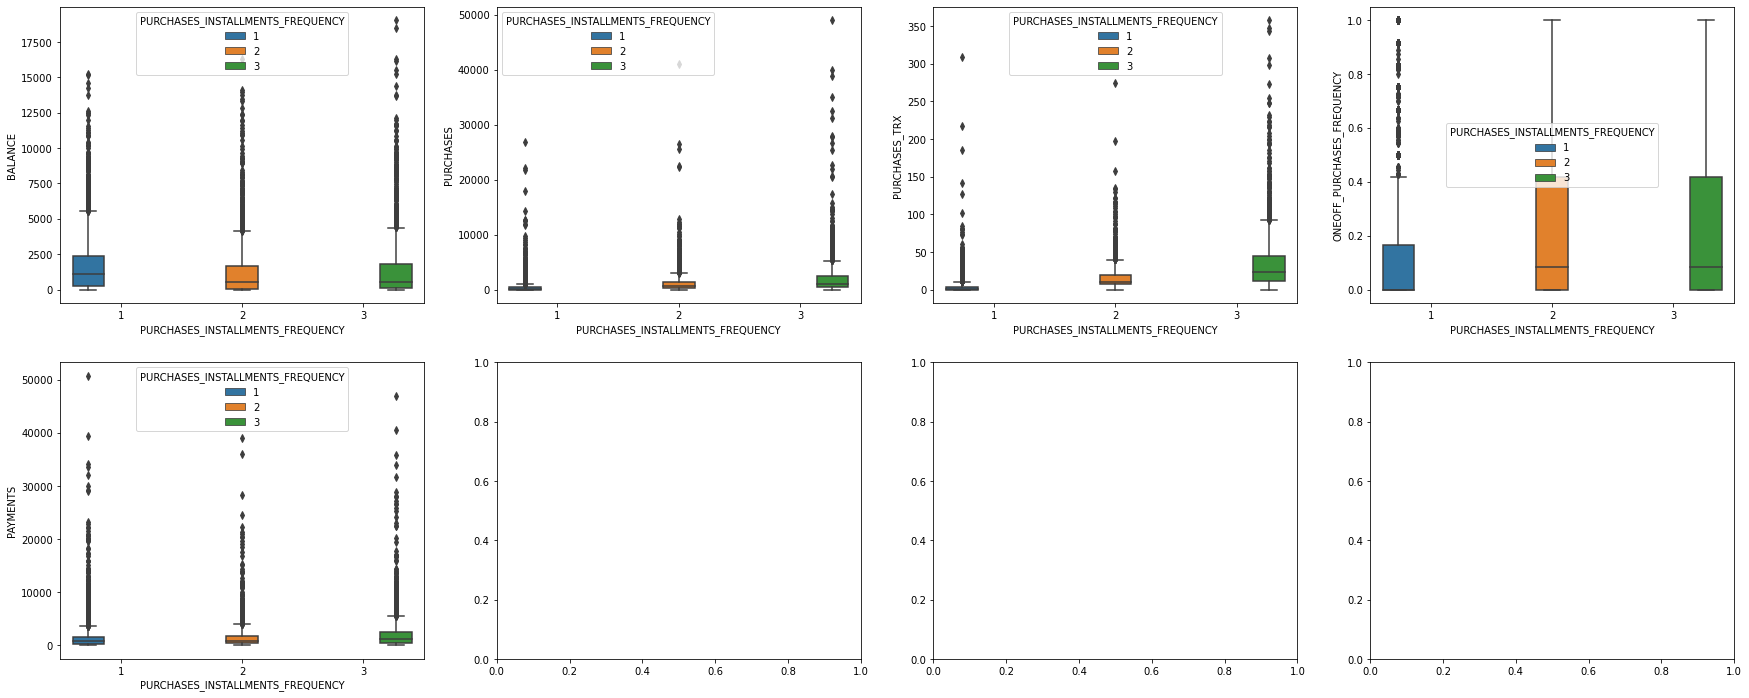

In [157]:
boxPlot(numDfGroup5, 'PURCHASES_INSTALLMENTS_FREQUENCY', 5)

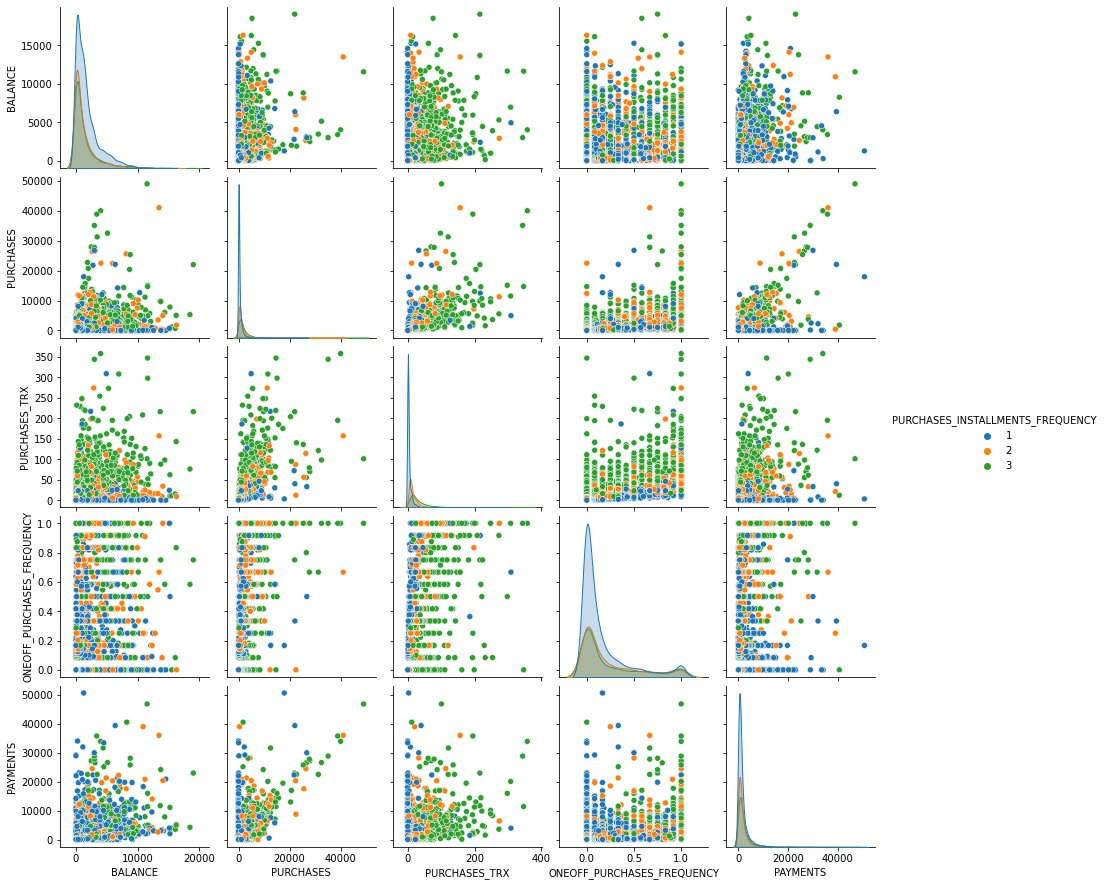

In [158]:
sns.pairplot(data=numDfGroup5, hue='PURCHASES_INSTALLMENTS_FREQUENCY')

**Summary**

- คนที่มี PURCHASES สูง ส่วนใหญ่จะมี PURCHASES_INSTALLMENTS_FREQUENCY สูงตามไปด้วย
- คนที่มี PURCHASES_TRX ต่ำ ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY ต่ำ ส่วนคนที่มี PURCHASES_TRX สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY มากกว่า ONEOFF_PURCHASES_FREQUENCY

**PAYMENTS**

In [159]:
selectedNumDf.describe()

BALANCE     PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
count   8950.000000   8950.000000    8950.000000                 8950.000000   
mean    1564.474828   1003.204834      14.709832                    0.202458   
std     2081.531879   2136.634782      24.857649                    0.298336   
min        0.000000      0.000000       0.000000                    0.000000   
25%      128.281915     39.635000       1.000000                    0.000000   
50%      873.385231    361.280000       7.000000                    0.083333   
75%     2054.140036   1110.130000      17.000000                    0.300000   
max    19043.138560  49039.570000     358.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY      PAYMENTS  
count                       8950.000000   8950.000000  
mean                           0.364437   1733.143852  
std                            0.397448   2895.063757  
min                            0.000000      0.000000  
25%                            0.000000    383.276166  
50%                            0.166667    856.901546  
75%                            0.750000   1901.134317  
max                            1.000000  50721.483360

In [160]:
numDfGroup6 = selectedNumDf.copy()
num = [-0.01, 383.276, 856.902, 1901.134, 50721.484]
balanceGroup=['1','2','3', '4']
numDfGroup6['PAYMENTS']=pd.cut(df['PAYMENTS'], num, labels= balanceGroup)
numDfGroup6.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                    0.000000   
1  3202.467416       0.00              0                    0.000000   
2  2495.148862     773.17             12                    1.000000   
3  1666.670542    1499.00              1                    0.083333   
4   817.714335      16.00              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY PAYMENTS  
0                          0.083333        1  
1                          0.000000        4  
2                          0.000000        2  
3                          0.000000        1  
4                          0.000000        2

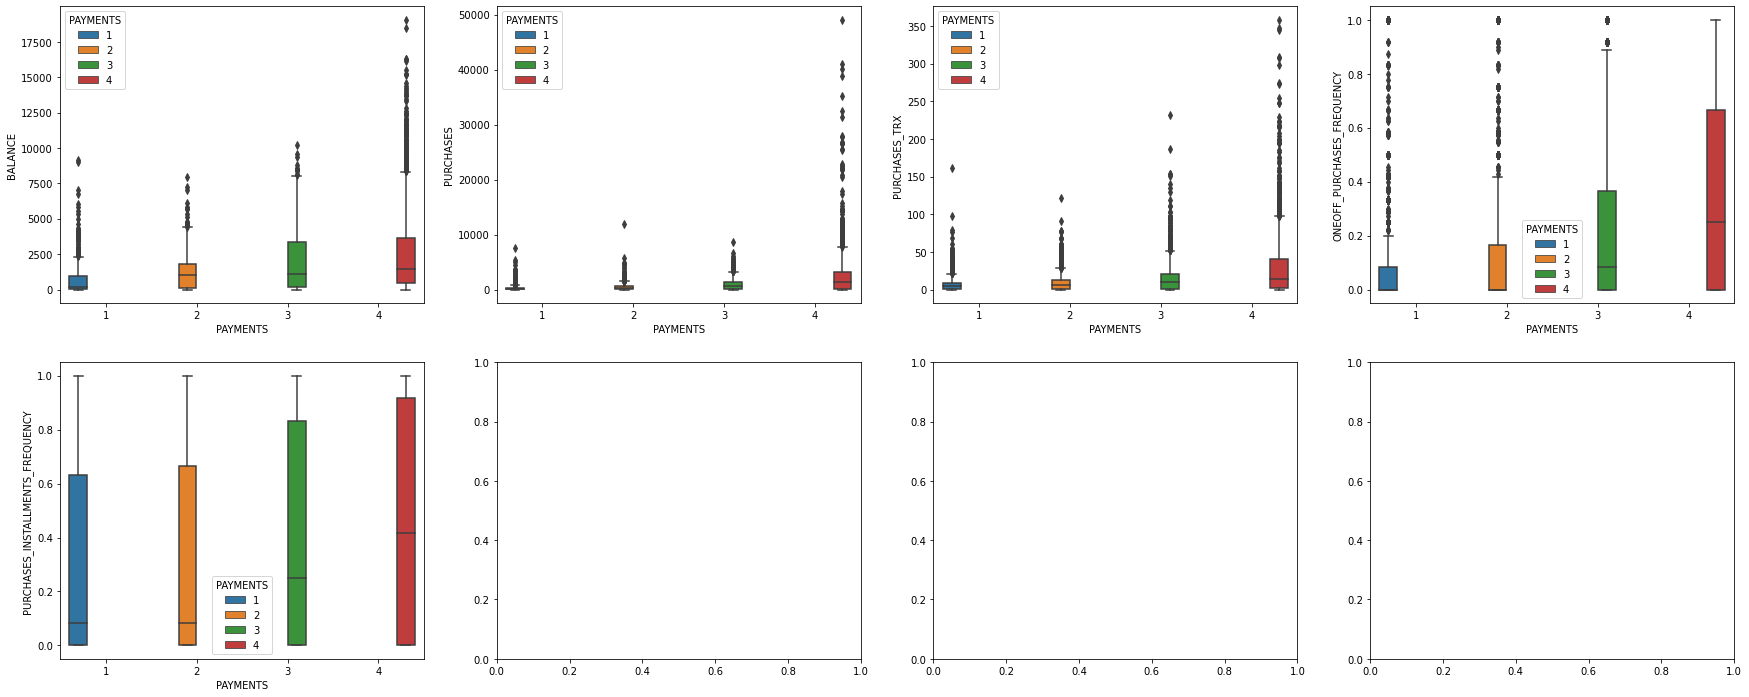

In [161]:
boxPlot(numDfGroup6, 'PAYMENTS', 5)

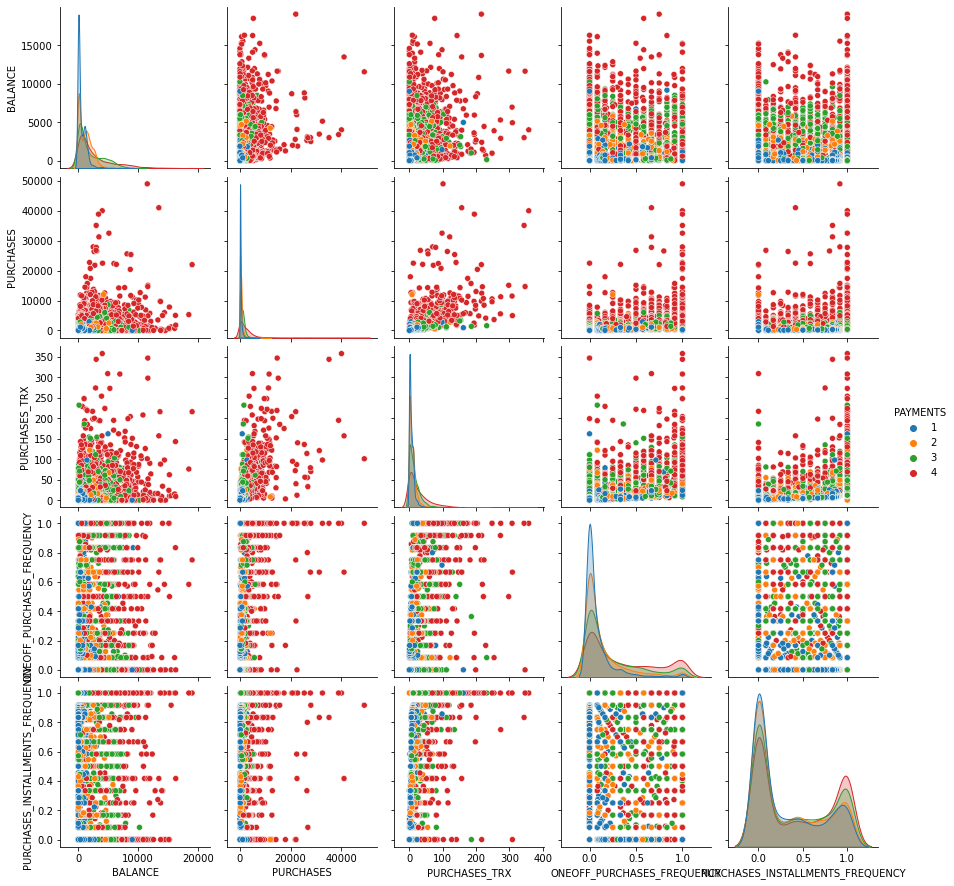

In [162]:
sns.pairplot(data=numDfGroup6, hue='PAYMENTS')

**Summary**

- คนที่มี BALANCE สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PAYMENTS สูงด้วย
- คนที่มี PURCHASES สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PAYMENTS สูงด้วย
- กลุ่มที่มี PURCHASES มากกว่า ส่วนใหญ่จะมี ONEOFF_PURCHASES_FREQUENCY เพิ่มขึ้นตามไปด้วย 

#### **Data Exploration Summary**

- PURCHASES กับ PURCHASES_TRX, PURCHASES กับ PAYMENTS มีความสัมพันธ์ไปในทางเดียวกัน
- คนที่มี BALANCE สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PAYMENTS สูงด้วย
- คนที่มี PURCHASES สูง ส่วนใหญ่จะเป็นคนที่มี BALANCE, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENTY, PURCHASES_INSTALLMENTS_FREQUENCY และ PAYMENTS สูง ส่วนคนที่มี PURCHASES ต่ำ ส่วนใหญ่จะมี ONEOFF_PURCHASES_FREQUENCY น้อย แต่มีทั้งกลุ่มที่มี BALANCE ต่ำ ปานกลาง และสูง
- คนที่มี PURCHASES_TRX ต่ำ ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY ต่ำ ส่วนคนที่มี PURCHASES_TRX สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY สูงและสูงกว่า ONEOFF_PURCHASES_FREQUENCY
- คนที่มี ONEOFF_PURCHASES_FREQUENCY กับ PURCHASES_INSTALLMENTS_FREQUENCY น้อย ส่วนใหญ่จะเป็นกลุ่มคนที่มี PURCHASES น้อย 

# Edit preprocess detail

### **2.Data Proprocessing**

ไม่ได้ทำการ preproess ก่อนทำ clustering เนื่องจาก attribute ที่เลือกมาไม่มี missing value รวมถึงข้อมูลมีการกระจุกตัวและมีค่าที่ใกล้เคียงกัน ซึ่งการ scale และ fix skewed data ให้มีการกระจายตัวแบบ normal distribution จะทำให้เห็นความแตกต่างของข้อมูลน้อยลง รวมถึงอาจทำให้ข้อมูลใกล้กันมากขึ้นจนปนกัน

### **3.Clustering and Result Analysis**

ทำการ cluster ข้อมูล โดยเลือกใช้ K-means clustering เนื่องจากการทำ data exploration ทำให้เห็นแนวโน้มในการแบ่งกลุ่มของลูกค้าที่ค่อนข้างชัดเจน เช่น คนที่มี PURCHASES สูง ส่วนใหญ่จะเป็นคนที่มี BALANCE, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENTY, PURCHASES_INSTALLMENTS_FREQUENCY และ PAYMENTS สูง 

##### **K-means Clustering Function**

**findk()**

เป็น function สำหรับหาจำนวน cluster (k) โดยใช้ WCSS และ elbow methed ในการเลือก k

In [169]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def findk(x_train):
    K = [i+2 for i in range(9)]
    wcss = []
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=1)
        model = kmeans.fit(x_train)
        wcss.append(model.inertia_)

    plt.scatter(K, wcss)
    plt.plot(K, wcss)
    plt.title('WCSS')
    plt.ylabel('Scores')
    plt.xlabel('k')

    plt.show()

**kmeans()**

เป็น function สำหรับทำ k-means clustering

In [170]:
def kmeans(x, k):
    kmeans = KMeans(n_clusters=k, random_state=1)
    model = kmeans.fit(x)

    # predict
    y = model.predict(x)

    # convert array to dataframe
    y = pd.DataFrame(y, columns=['y_pred'])

    # print model parameters
    print(model.get_params())
    
    return model, y

**findCentroid()**

เป็น function สำหรับหา centroid ของแต่ละ feature ในแต่ละ cluster

In [171]:
def findCentroid(model, x_train):
    centroid = model.cluster_centers_
    featureCen = [[] for i in range(centroid.shape[1])]
    for i in range(centroid.shape[1]):
        for j in range(centroid.shape[0]):
            featureCen[i].append(centroid[j,i])
        print(x_train.columns[i], featureCen[i])
    return featureCen

**sepCluster()**

เป็น function สำหรับแยกข้อมูลในแต่ละ cluster

In [172]:
def sepCluster(df, colName, n):
    clusterDf = []
    for i in range(n):
        clusterDf.append((df[df[colName] == i]).loc[:, df.columns != colName])
    return clusterDf

#### **3.1 K-means clustering 1**

โดยใช้ข้อมูลที่ทำการตัด missing value แล้ว

In [196]:
dfModel1 = newNumDf.copy()
dfModel1.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                    0.000000   
1  3202.467416       0.00              0                    0.000000   
2  2495.148862     773.17             12                    1.000000   
3  1666.670542    1499.00              1                    0.083333   
4   817.714335      16.00              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  
0                          0.083333   201.802084  
1                          0.000000  4103.032597  
2                          0.000000   622.066742  
3                          0.000000     0.000000  
4                          0.000000   678.334763

**Find k**

หาจำนวน cluster หรือค่า k โดยใช้ elbow method

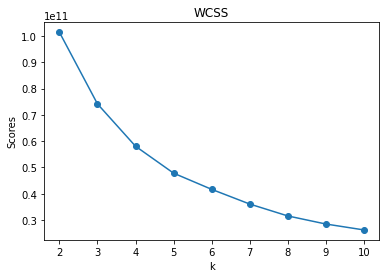

In [197]:
findk(dfModel1)

##### **K-means clustering (choose k = 3)**

ทำการแบ่งกลุ่มข้อมูล โดยเลือกใช้ k เท่ากับ 3

In [198]:
model, y_pred = kmeans(dfModel1, 3)

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 3, 'n_init': 10, 'random_state': 1, 'tol': 0.0001, 'verbose': 0}


**Find centroid of each feature**

ทำการหาค่า centroid ของแต่ละ feature ในแต่ละ cluster เพื่อนำมาวิเคราะห์ลักษณะของแต่ละ cluster

In [199]:
featureCen = findCentroid(model, dfModel1)

BALANCE [870.4094456798549, 4359.60186889849, 4607.77447523077]
PURCHASES [607.8299400947333, 2020.974755287009, 10862.963504273504]
PURCHASES_TRX [10.75271663415992, 27.07009063444109, 82.64102564102566]
ONEOFF_PURCHASES_FREQUENCY [0.16773819977709664, 0.3267564090634442, 0.5742701965811967]
PURCHASES_INSTALLMENTS_FREQUENCY [0.35189589091668994, 0.40252944712990946, 0.59503647008547]
PAYMENTS [929.5693373076067, 3981.592652856798, 19227.802837179486]


**Seperate cluster**

แบ่งข้อมูลตามกลุ่ม cluster เพื่อนำมา visualize ประกอบการวิเคราะห์

In [200]:
dfResult = pd.concat([dfModel1, y_pred], axis=1)
dfCluster = sepCluster(dfResult, 'y_pred', 3)
dfResult.head()

BALANCE  PURCHASES  PURCHASES_TRX  ONEOFF_PURCHASES_FREQUENCY  \
0    40.900749      95.40              2                    0.000000   
1  3202.467416       0.00              0                    0.000000   
2  2495.148862     773.17             12                    1.000000   
3  1666.670542    1499.00              1                    0.083333   
4   817.714335      16.00              1                    0.083333   

   PURCHASES_INSTALLMENTS_FREQUENCY     PAYMENTS  y_pred  
0                          0.083333   201.802084       0  
1                          0.000000  4103.032597       1  
2                          0.000000   622.066742       0  
3                          0.000000     0.000000       0  
4                          0.000000   678.334763       0

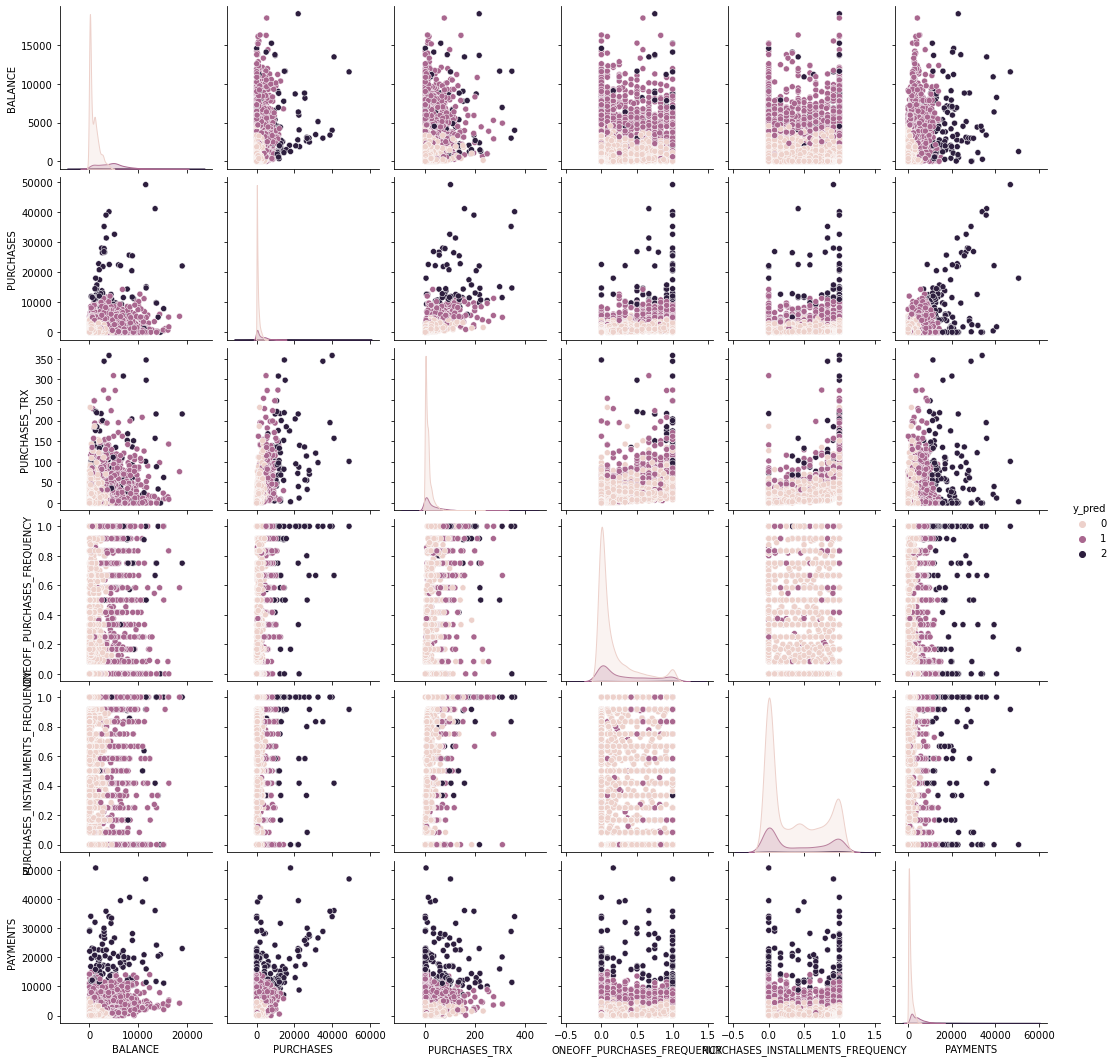

In [201]:
sns.pairplot(data=dfResult, hue='y_pred')

In [ ]:
histPlot(dfResult, 'y_pred', 6)

In [ ]:
boxPlot(dfResult, 'y_pred', 6)

# Edit Cluster detail & Result analysis

**Cluster Detail**

จากค่า centroid ของแต่ละ feature และการ visualize แต่ละ cluster พบว่าแต่ละ cluster มีลักษณะดังนี้

1. Cluster 0

    - มี BALANCE, PURCHASES, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENCY, PAYMENTS ต่ำที่สุด
    - มี PURCHASES_INSTALLMENTS_FREQUENCY น้อยที่สุด
    - มี PURCHASES_INSTALLMENTS_FREQUENCY สูงกว่า ONEOFF_PURCHASES_FREQUENCY ค่อนข้างมากกว่า Cluster อื่น ๆ 

2. Cluster 1

    - มี BALANCE, PURCHASES, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PAYMENTS ปานกลาง
    - มี PURCHASES_INSTALLMENTS_FREQUENCY กับ ONEOFF_PURCHASES_FREQUENCY ใกล้เคียงกัน

3. Cluster 2

    - มี BALANCE ปานกลางถึงสูง 
    - มี PURCHASES, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, PAYMENTS สูงที่สุด
    - มี PURCHASES_INSTALLMENTS_FREQUENCY กับ ONEOFF_PURCHASES_FREQUENCY ใกล้เคียงกัน

**Result Analysis**

จากการทำ data exploration จะได้ว่า

- PURCHASES กับ PURCHASES_TRX, PURCHASES กับ PAYMENTS มีความสัมพันธ์ไปในทางเดียวกัน
- คนที่มี BALANCE สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PAYMENTS สูงด้วย
- คนที่มี PURCHASES สูง ส่วนใหญ่จะเป็นคนที่มี BALANCE, PURCHASES_TRX, ONEOFF_PURCHASES_FREQUENTY, PURCHASES_INSTALLMENTS_FREQUENCY และ PAYMENTS สูง ส่วนคนที่มี PURCHASES ต่ำ ส่วนใหญ่จะมี ONEOFF_PURCHASES_FREQUENCY น้อย แต่มีทั้งกลุ่มที่มี BALANCE ต่ำ ปานกลาง และสูง
- คนที่มี PURCHASES_TRX ต่ำ ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY ต่ำ ส่วนคนที่มี PURCHASES_TRX สูง ส่วนใหญ่จะเป็นกลุ่มที่มี PURCHASES_INSTALLMENTS_FREQUENCY สูงและสูงกว่า ONEOFF_PURCHASES_FREQUENCY
- คนที่มี ONEOFF_PURCHASES_FREQUENCY กับ PURCHASES_INSTALLMENTS_FREQUENCY น้อย ส่วนใหญ่จะเป็นกลุ่มคนที่มี PURCHASES น้อย 

ซึ่งจะเห็นได้ว่าข้อมูลจากการทำ data exploration และข้อมูลจากแต่ละ cluster เป็นไปในทางเดียวกัน แม้บาง cluster จะมีบาง feature ที่ใกล้เคียงกัน รวมถึงผลลัพธ์ที่ได้เป็นไปตามสมมตฐานที่ตั้งไว้ นั่นคือ จำนวนเงินที่มี จำนวนเงินที่ใช้ และลักษณะการใช้จ่าย ทำให้แบ่งกลุ่มลูกค้าได้ ซึ่งแต่ละกลุ่มเหมาะกับรูปแบบประกันและการจ่ายเบี้ยที่แตกต่างกัน  

โดยสามารถสรุปลักษณะของกลุ่มลูกค้าและรูปแบบประกันที่เหมาะสมได้ดังนี้

1. Cluster 0

    - เป็นกลุ่มคนที่มีเงินคงเหลือน้อย ใช้จ่ายน้อย มีค่าใช้จ่ายต่อครั้งน้อย และมีแนวโน้มจ่ายแบบผ่อนมากกว่าจ่ายทีเดียว
    - เหมาะกับประกันที่มีค่าเบี้ยประกันไม่สูง เช่น ประกันชีวิตแบบชั่วระยะเวลา รวมถึงเหมาะกับการเสนอให้จ่ายเบี้ยแบบผ่อน

2. Cluster 1

    - เป็นกลุ่มคนที่มีเงินคงเหลือปานกลาง ใช้จ่ายปานกลาง มีค่าใช้จ่ายต่อครั้งปานกลาง และมีลักษณะการใช้จ่ายแบบผ่อนกับจ่ายทีเดียวใกล้เคียงกัน
    - เหมาะกับประกันที่มีค่าเบี้ยประกันปานกลางและไม่ได้มีการลงทุนมาก เช่น ประกันแบบตลอดชีพ ประกันชีวิตแบบสะสมทรัพย์ แต่ลักษณะการจ่ายเบี้ย (ผ่อน/จ่ายทีเดียว) ขึ้นกับค่าเบี้ยประกัน เนื่องจากเมื่อต้องจ่ายด้วยจำนวนเงินที่มากขึ้น คนมีแนวโน้มจะจ่ายแบบผ่อนมากกว่า แต่ถ้าไม่มากมักจ่ายแบบทีเดียว

3. Cluster 2

    - เป็นกลุ่มคนที่มีเงินคงเหลือเยอะ ใช้จ่ายเยอะ มีค่าใช้จ่ายต่อครั้งสูงกว่า cluster อื่น ๆ และมีลักษณะการใช้จ่ายแบบผ่อนกับจ่ายทีเดียวใกล้เคียงกัน
    - เหมาะกับประกันที่สามารถนำเงินไปลงทุนเพื่อให้ผลตอบแทนที่มากขึ้นได้ เช่น ประกันชีวิตควบการลงทุน แต่ลักษณะการจ่ายเบี้ย (ผ่อน/จ่ายทีเดียว) ขึ้นกับค่าเบี้ยประกันเช่นเดียวกับ cluster 1